In [ ]:
 %pip install pybaseball

Make sure to have the kaggle dataset downloaded: https://www.kaggle.com/datasets/eddiedew/sports-analytics-savant-data

In [1]:
import pybaseball
import pandas as pd

In [2]:
savant = pd.read_csv('./2022-2024-savant.csv')

In [3]:
savant

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,CH,2022-10-05,80.8,-0.76,6.61,"Baker, Bryan",624415,641329,field_out,hit_into_play,...,5,4,5,Infield shift,Standard,213.0,0.035,-0.099,NaN,NaN
1,FF,2022-10-05,97.7,-0.58,6.60,"Baker, Bryan",643376,641329,strikeout,swinging_strike,...,5,4,5,Standard,Standard,189.0,0.052,-0.134,NaN,NaN
2,CH,2022-10-05,84.9,-0.55,6.58,"Baker, Bryan",643376,641329,NaN,ball,...,5,4,5,Standard,Standard,212.0,0.000,0.023,NaN,NaN
3,FF,2022-10-05,97.2,-0.42,6.60,"Baker, Bryan",643376,641329,NaN,swinging_strike,...,5,4,5,Standard,Standard,192.0,0.000,-0.036,NaN,NaN
4,SL,2022-10-05,86.2,-0.55,6.64,"Baker, Bryan",643376,641329,NaN,called_strike,...,5,4,5,Standard,Standard,127.0,0.000,-0.031,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135990,FF,2024-03-20,95.7,-2.13,5.77,"Darvish, Yu",660271,506433,NaN,ball,...,0,0,0,NaN,NaN,201.0,0.000,0.062,NaN,NaN
2135991,SI,2024-03-20,93.9,-2.17,5.70,"Darvish, Yu",605141,506433,NaN,ball,...,0,0,0,NaN,NaN,233.0,0.000,0.110,NaN,NaN
2135992,SI,2024-03-20,93.4,-2.00,5.70,"Darvish, Yu",605141,506433,NaN,ball,...,0,0,0,NaN,NaN,237.0,0.000,0.048,NaN,NaN
2135993,FF,2024-03-20,92.6,-1.94,5.83,"Darvish, Yu",605141,506433,NaN,foul,...,0,0,0,NaN,NaN,189.0,0.000,-0.044,NaN,NaN


In [11]:
savant.shape

(2135995, 94)

In [4]:
savant.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
savant.groupby('pitch_name')['release_speed'].describe()

,count,mean,std,min,25%,50%,75%,max
pitch_name,,,,,,,,
4-Seam Fastball,692123.0,94.129435,2.506797,70.4,92.50,94.20,95.8,105.5
Changeup,229985.0,85.406496,3.383232,40.2,83.20,85.60,87.8,98.0
Curveball,148865.0,79.053403,3.704301,36.1,76.80,79.40,81.5,92.8
Cutter,166536.0,89.308350,3.265170,53.4,87.20,89.00,91.1,104.0
Eephus,1623.0,49.501417,7.603955,31.9,43.80,49.40,54.5,80.4
Forkball,926.0,82.818359,1.759142,75.4,81.60,82.90,84.1,88.2
Knuckle Curve,42014.0,81.668313,3.435266,63.7,79.10,81.70,84.2,94.2
Knuckleball,1182.0,76.377750,5.276361,46.9,75.20,77.30,79.1,84.2
Other,3032.0,68.009334,10.098056,34.3,60.40,67.40,75.6,95.1


In [6]:
(savant['pitch_name'].value_counts() / len(savant)).sort_values(ascending=False)

pitch_name
4-Seam Fastball    0.324032
Slider             0.165978
Sinker             0.155322
Changeup           0.107674
Cutter             0.077969
Curveball          0.069694
Sweeper            0.049472
Split-Finger       0.022778
Knuckle Curve      0.019671
Slurve             0.003552
Other              0.001419
Eephus             0.000760
Knuckleball        0.000553
Forkball           0.000434
Screwball          0.000109
Slow Curve         0.000080
Pitch Out          0.000066
Name: count, dtype: float64

In [7]:
pitches_wanted = ['4-Seam Fastball', 'Slider', 'Sinker', 'Changeup']

In [8]:
savant[savant['release_speed'] == 105.5]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
1528768,FF,2024-09-03,105.5,-1.87,5.28,"Joyce, Ben",669242,690829,strikeout,swinging_strike,...,2,2,2,Strategic,Standard,228.0,0.032,-0.061,71.65858,6.39825


<Axes: xlabel='plate_x', ylabel='plate_z'>

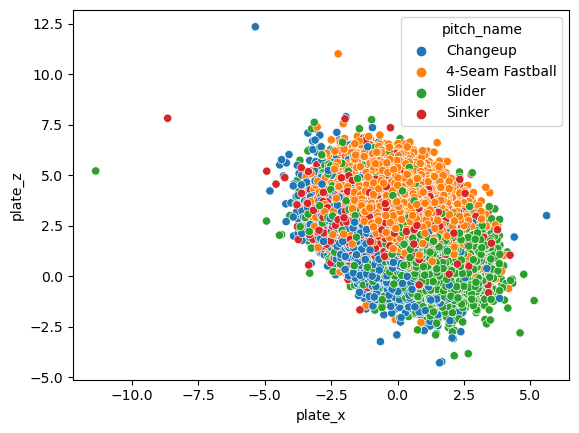

In [9]:
import seaborn as sns
subset = savant[(savant['pitch_name'].isin(pitches_wanted)) & (savant['p_throws'] == 'R')]

sns.scatterplot(x='plate_x', y='plate_z', data = subset, hue='pitch_name')

In [10]:
savant.groupby('pitch_name')['release_spin_rate'].mean().sort_values(ascending=False)

pitch_name
Sweeper            2568.818620
Curveball          2546.788246
Slurve             2533.366733
Knuckle Curve      2464.361855
Slider             2412.484571
Cutter             2384.478090
4-Seam Fastball    2284.095837
Slow Curve         2266.178571
Pitch Out          2200.164286
Sinker             2146.630079
Screwball          2065.241379
Changeup           1781.509929
Other              1664.913490
Split-Finger       1343.089371
Eephus             1215.813695
Forkball           1061.010941
Knuckleball         284.344203
Name: release_spin_rate, dtype: float64

In [13]:
savant.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [12]:
import numpy as np
# Change lefty trajectory to a righty
savant['pfx_x'] = np.where(savant['p_throws'] == 'L', savant['pfx_x'].mul(-1), savant['pfx_x'])
savant['release_pos_x'] = np.where(savant['p_throws'] == 'L', savant['release_pos_x'].mul(-1), 
                                   savant['release_pos_x'])

savant.loc[savant['p_throws'] == 'L', 'spin_axis'] = 360 - savant.loc[savant['p_throws'] == 'L', 'spin_axis']

In [16]:
features = ['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x',
       'pfx_z', 'release_extension', 'spin_axis', 'release_spin_rate', 'pitch_name']



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

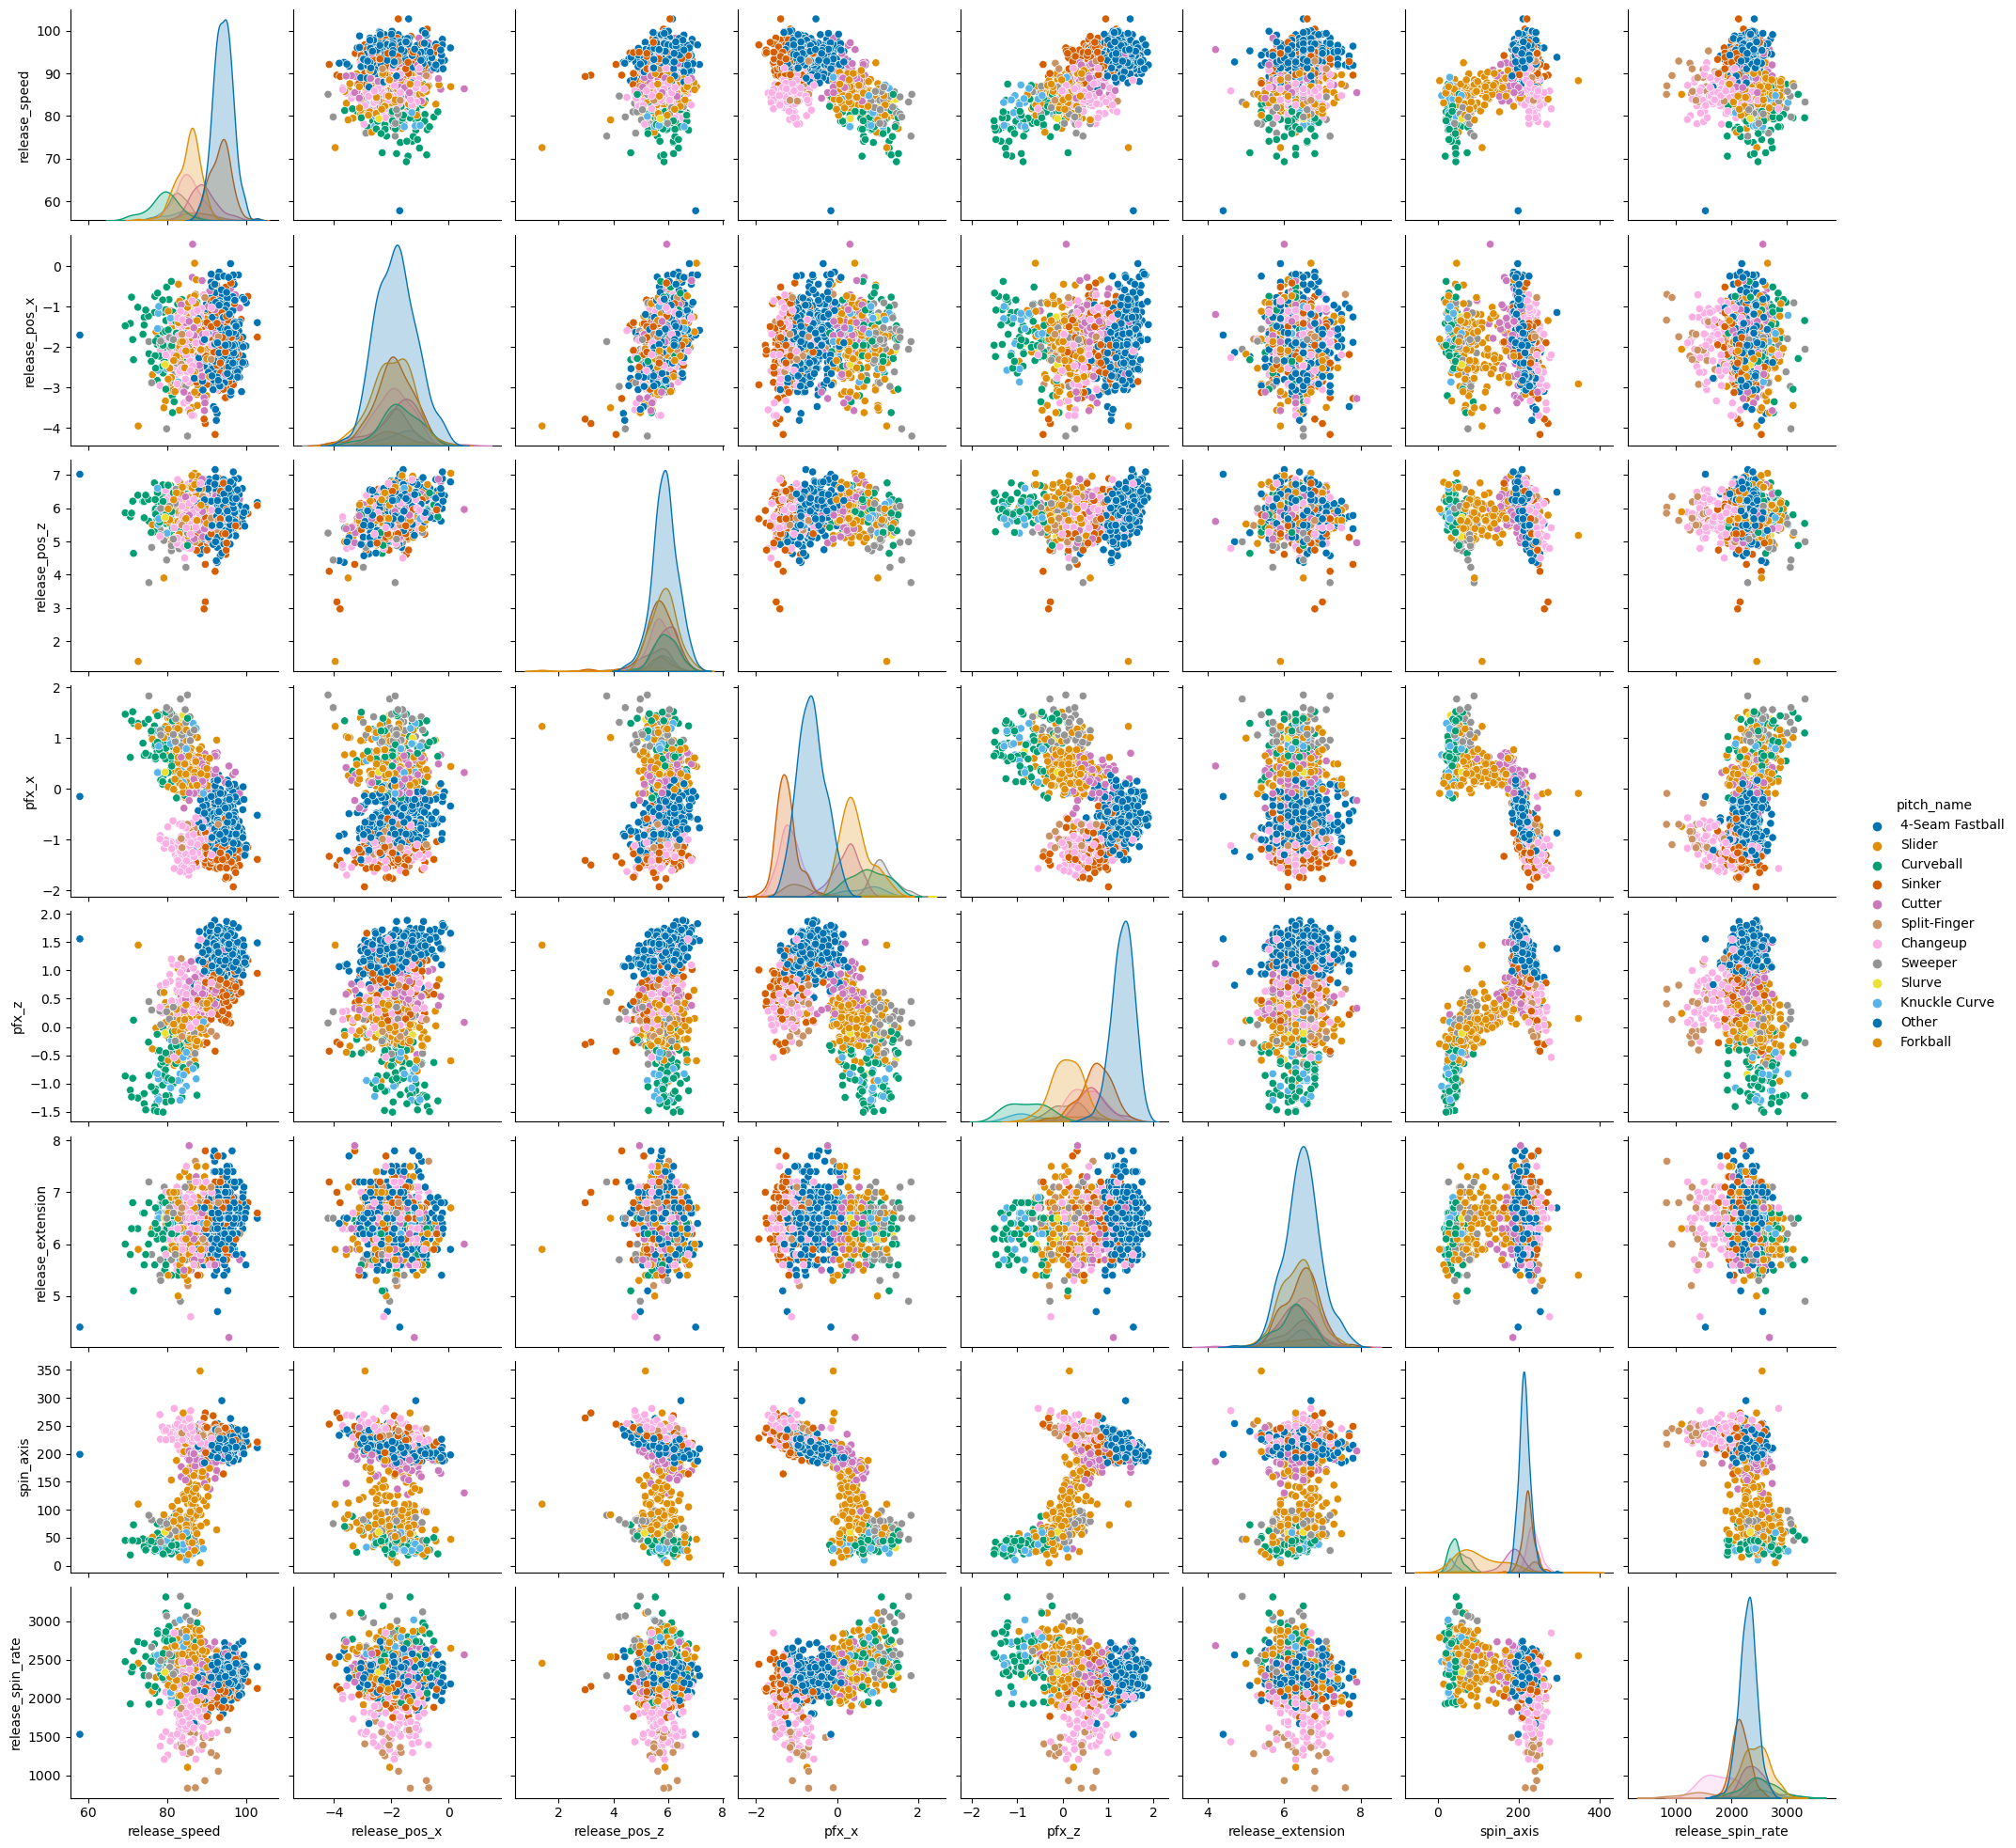

In [17]:
sns.pairplot(savant[features].sample(1000), kind='scatter', diag_kind='kde', 
             hue='pitch_name', palette='colorblind')



In [20]:
model_data = savant[savant['game_year'] < 2024][features]

In [22]:
model_data.isna().sum()

release_speed         684
release_pos_x         683
release_pos_z         683
pfx_x                 698
pfx_z                 688
release_extension    2703
spin_axis            6624
release_spin_rate    6586
pitch_name            644
dtype: int64

In [23]:
model_data.dropna(inplace=True)

In [25]:
(model_data['pitch_name'].value_counts() / len(model_data)) * 100

pitch_name
4-Seam Fastball    32.762995
Slider             16.965315
Sinker             15.309814
Changeup           11.050978
Cutter              7.620422
Curveball           7.178137
Sweeper             4.386984
Knuckle Curve       2.135406
Split-Finger        1.913348
Slurve              0.344359
Other               0.168234
Eephus              0.073550
Forkball            0.053965
Knuckleball         0.014865
Slow Curve          0.010356
Pitch Out           0.006059
Screwball           0.005213
Name: count, dtype: float64

In [29]:
model_data = model_data[~model_data['pitch_name'].isin(['Slurve', 'Other', 'Eephus', 'Forkball', 'Knuckleball',
                                          'Slow Curve', 'Pitch Out', 'Screwball'])]

In [31]:
model_data.isna().sum()

release_speed        0
release_pos_x        0
release_pos_z        0
pfx_x                0
pfx_z                0
release_extension    0
spin_axis            0
release_spin_rate    0
pitch_name           0
dtype: int64

In [33]:
pd.set_option('display.float_format', '{:.2f}'.format)

model_data.describe()

,release_speed,release_pos_x,release_pos_z,pfx_x,pfx_z,release_extension,spin_axis,release_spin_rate
count,1409845.00,1409845.00,1409845.00,1409845.00,1409845.00,1409845.00,1409845.00,1409845.00
mean,89.04,-1.88,5.79,-0.33,0.61,6.39,176.56,2248.27
std,5.95,0.72,0.55,0.83,0.73,0.45,72.44,330.47
min,40.00,-4.95,0.76,-2.73,-2.14,3.00,0.00,60.00
25%,84.70,-2.33,5.51,-1.04,0.16,6.10,128.00,2098.00
50%,89.90,-1.85,5.83,-0.49,0.67,6.40,209.00,2274.00
75%,93.90,-1.40,6.13,0.32,1.22,6.70,224.00,2444.00
max,104.80,1.21,7.51,2.87,2.80,12.10,360.00,3595.00


In [34]:
X = model_data.drop(columns='pitch_name')
y = model_data['pitch_name']

In [38]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape, X_test.shape

((986891, 8), (422954, 8))

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [50]:
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report


print('Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Accuracy 0.9243251039120094
                 precision    recall  f1-score   support

4-Seam Fastball       0.96      0.97      0.97    139839
       Changeup       0.94      0.95      0.95     46757
      Curveball       0.90      0.91      0.91     30670
         Cutter       0.85      0.83      0.84     32680
  Knuckle Curve       0.85      0.83      0.84      8878
         Sinker       0.94      0.93      0.93     64974
         Slider       0.89      0.90      0.90     72146
   Split-Finger       0.87      0.79      0.83      8168
        Sweeper       0.88      0.85      0.86     18842

       accuracy                           0.92    422954
      macro avg       0.90      0.88      0.89    422954
   weighted avg       0.92      0.92      0.92    422954

